In [1]:
import numpy as np
from pygabor.rectimecausgabor import RecursiveTimeCausGaborMethod
from importlib import reload
from matplotlib import pyplot as plt

In [2]:
#reload(pygabor.rectimecausgabor)

In [ ]:
# Generate a temporal signal for testing purposes

Nt = 500
delta_t = 0.1

time = delta_t * np.linspace(0, Nt-1, Nt)
omega_1 = 2 * np.pi / 20 * time
omega_2 = 2 * np.pi / 10 * time
omega_3 = 2 * np.pi / 5 * time
omega_4 = 2 * np.pi / 2 * time
testsignal = np.zeros(Nt)

testsignal = np.cos(omega_1) + np.cos(omega_2) + np.cos(omega_3) + np.cos(omega_4)
#testsignal = np.cos(omega_1)
#testsignal = np.cos(omega_2)

print(testsignal)


[ 4.          3.94070451  3.76774159  3.49541095  3.14602154  2.74776185
  2.33201537  1.93038255  1.57169964  1.27934439  1.06909051  0.94771881
  0.91251864  0.95172596  1.04585273  1.16977478  1.29537118  1.39445416
  1.44170022  1.41729302  1.30901699  1.11359474  0.83713507  0.49464639
  0.10866144 -0.29289322 -0.67937511 -1.02038978 -1.28875081 -1.46314603
 -1.53024874 -1.48606632 -1.33639348 -1.09632431 -0.78886941 -0.44281175
 -0.09000902  0.23759552  0.51096344  0.70666251  0.80901699  0.81149899
  0.717227    0.53852543  0.29559045  0.01439494 -0.27596024 -0.5461877
 -0.76975802 -0.92555778 -1.         -0.9883793  -0.89533905 -0.73440433
 -0.52662671 -0.29847399 -0.07917218  0.10223895  0.21984722  0.25351678
  0.19098301  0.02918667 -0.22528567 -0.55670026 -0.9415676  -1.35079275
 -1.75237676 -2.11440714 -2.40804707 -2.61023307 -2.70581924 -2.68896014
 -2.56359878 -2.34301351 -2.04846932 -1.70710678 -1.34927581 -1.00557574
 -0.70389142 -0.46671529 -0.30901699 -0.23686813 -0.

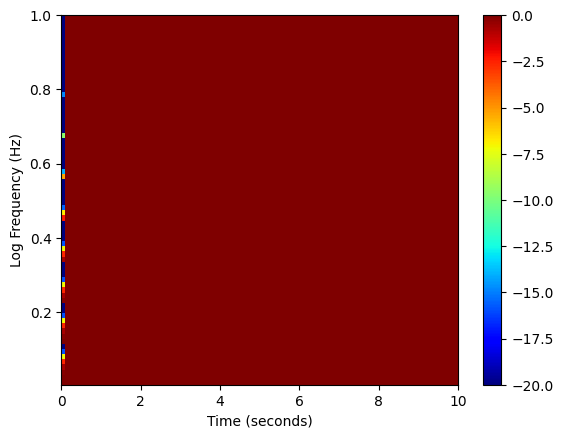

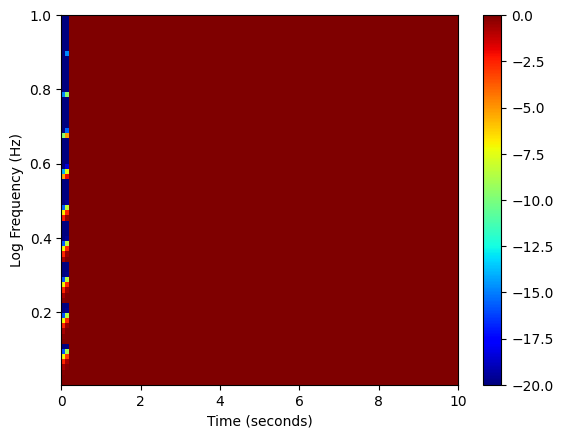

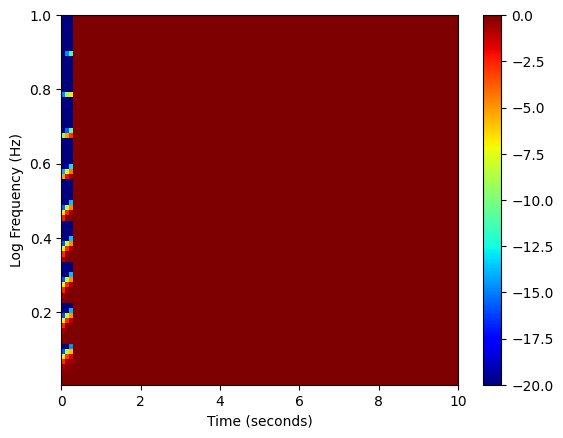

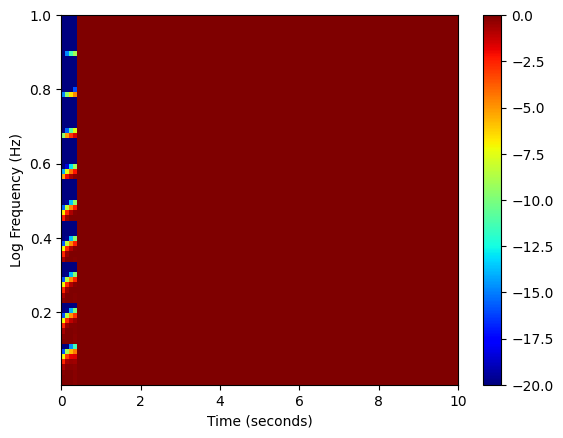

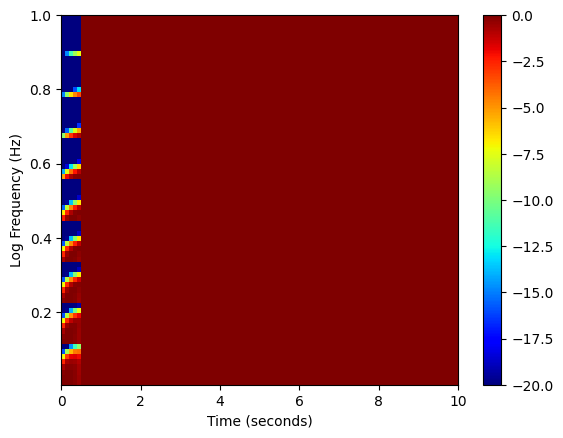

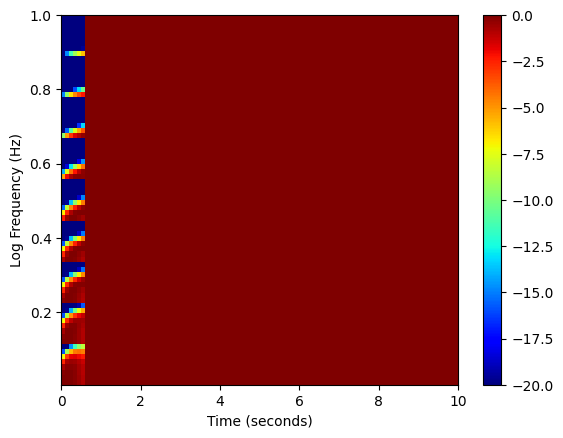

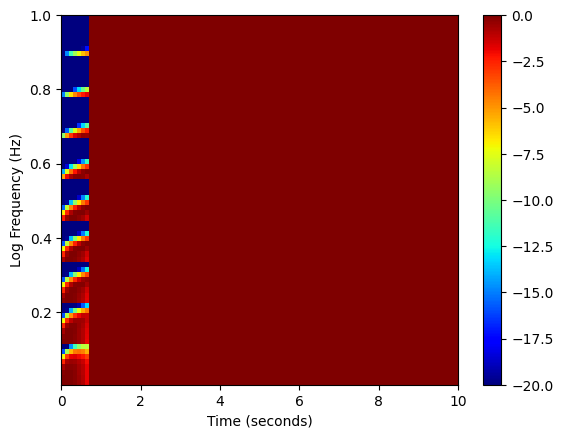

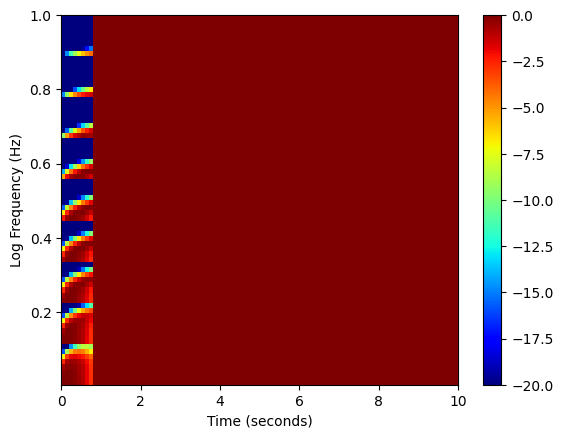

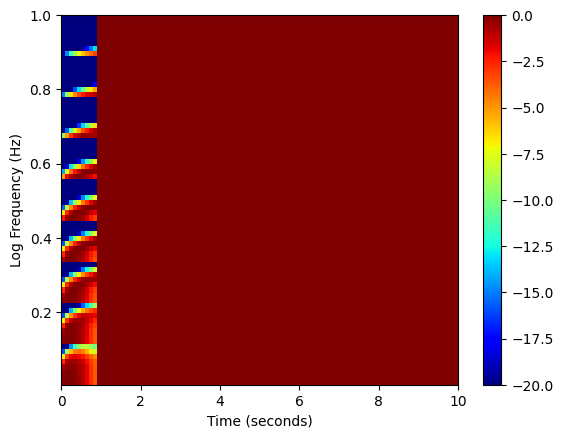

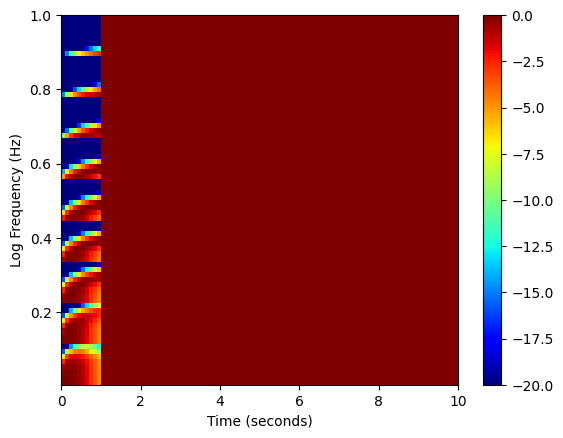

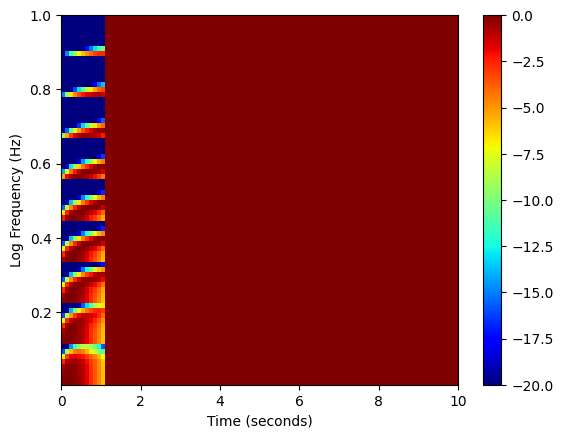

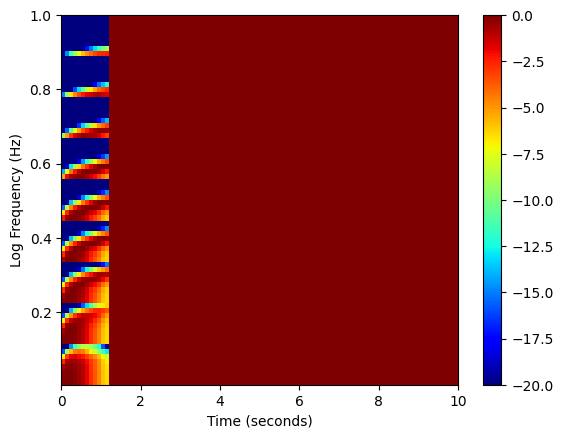

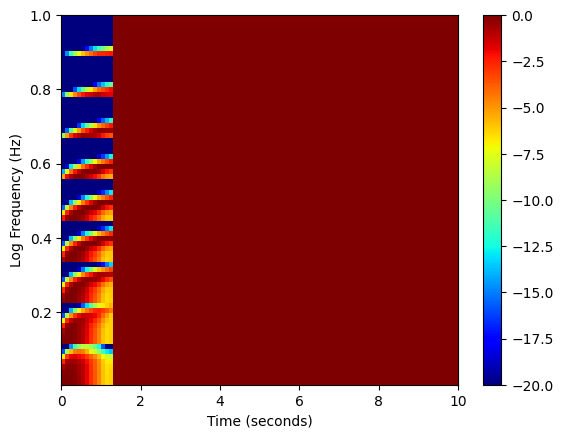

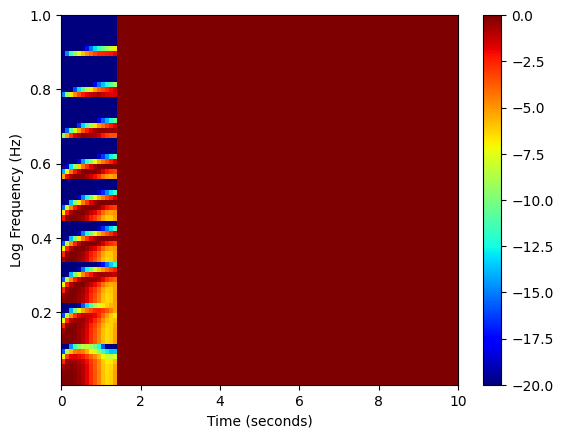

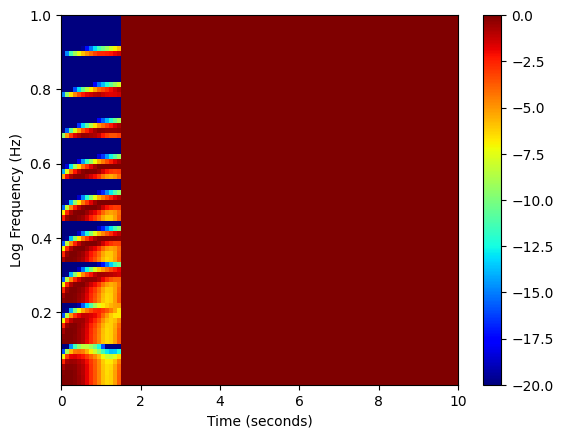

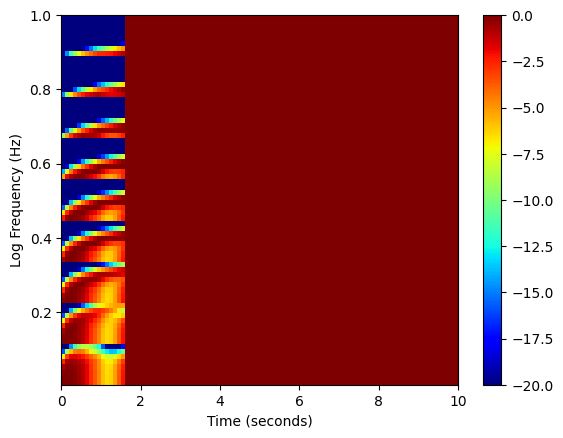

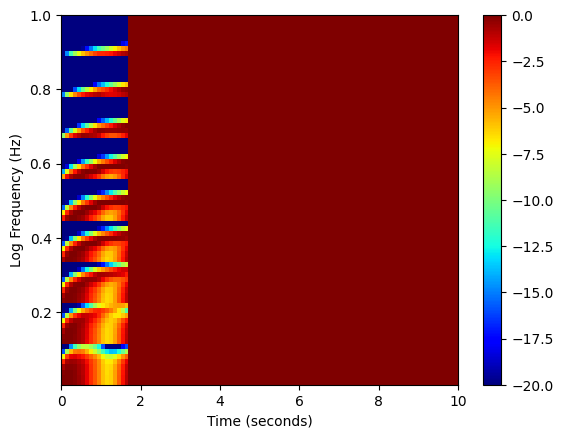

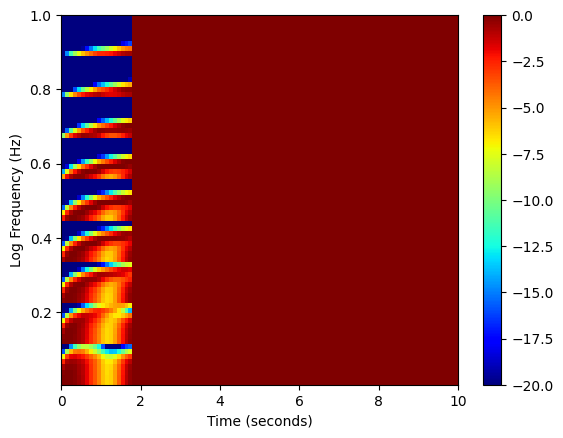

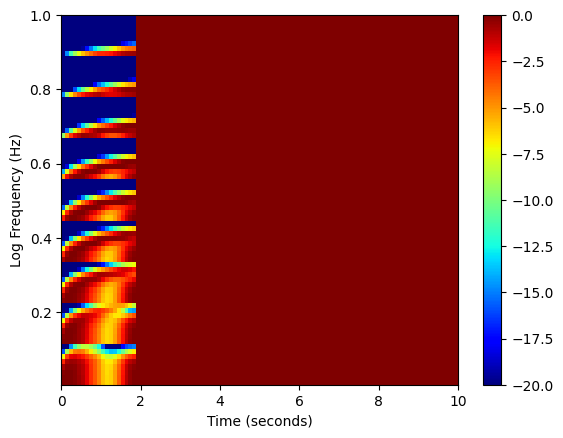

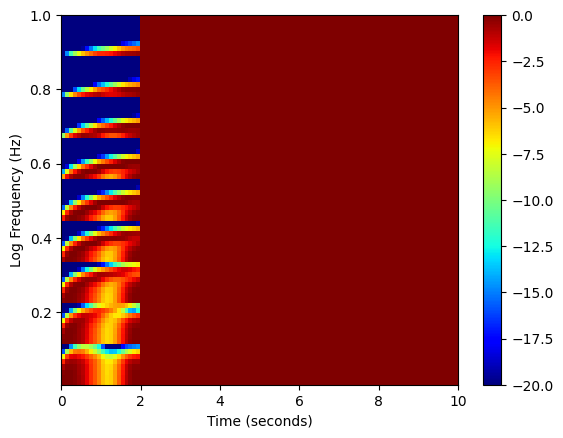

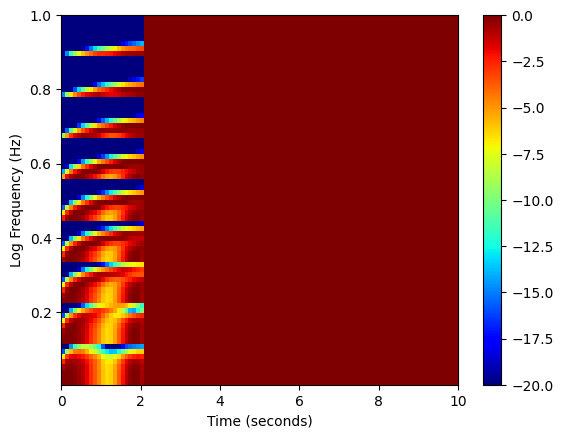

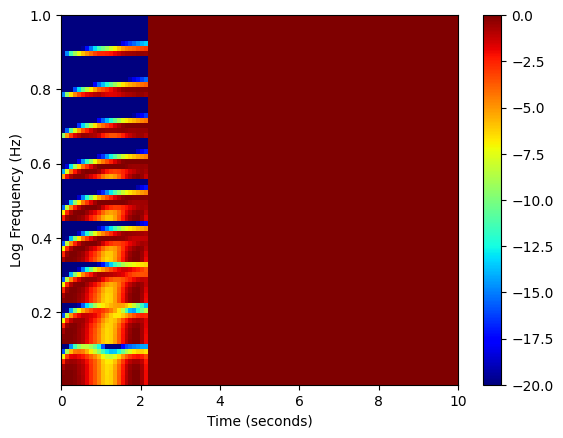

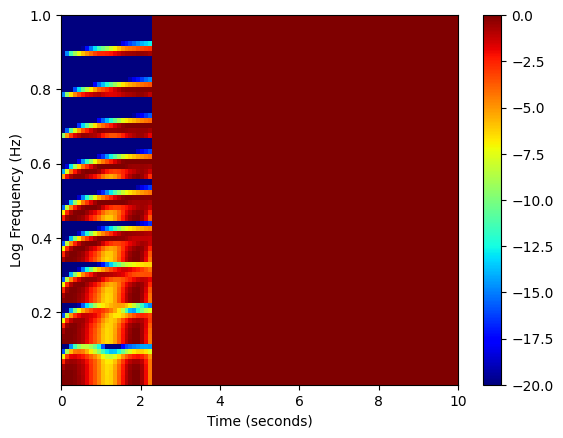

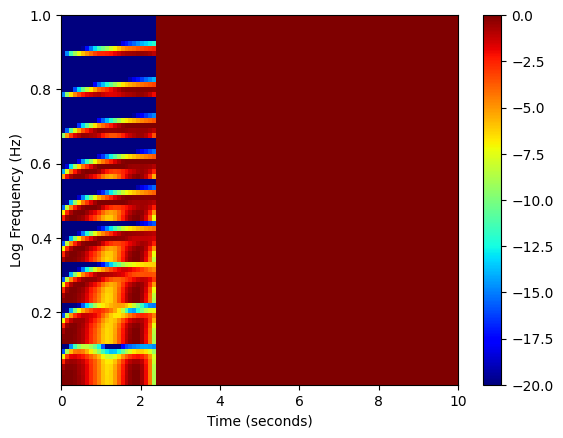

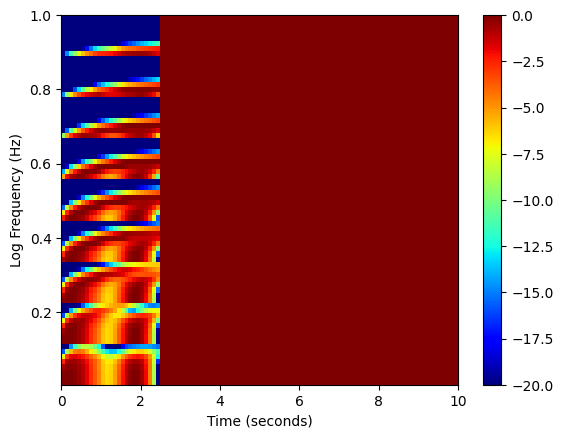

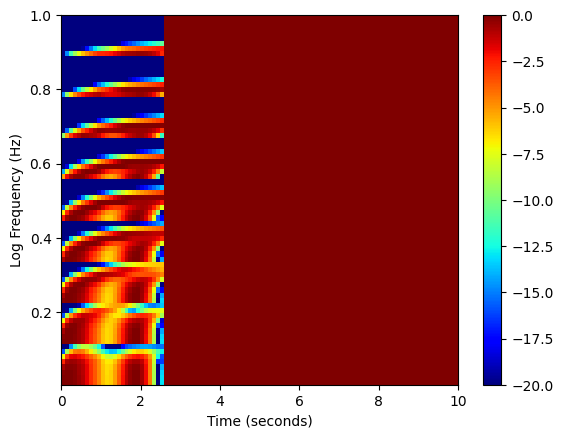

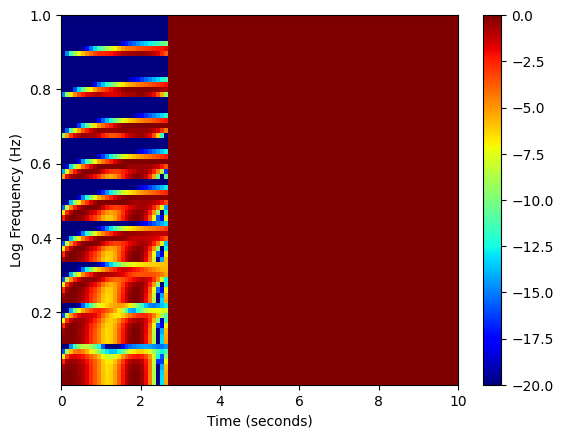

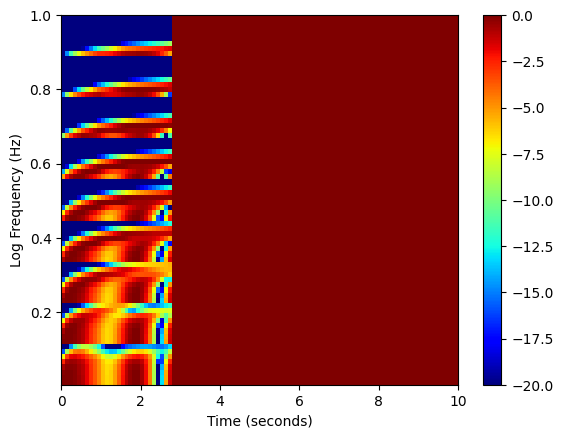

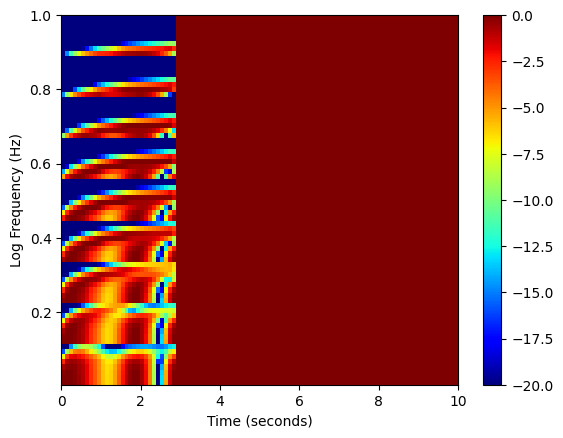

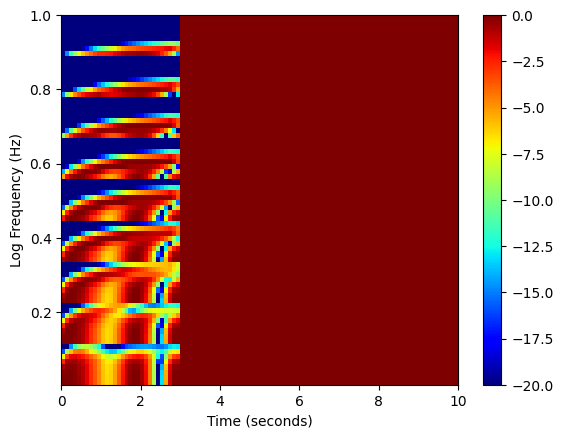

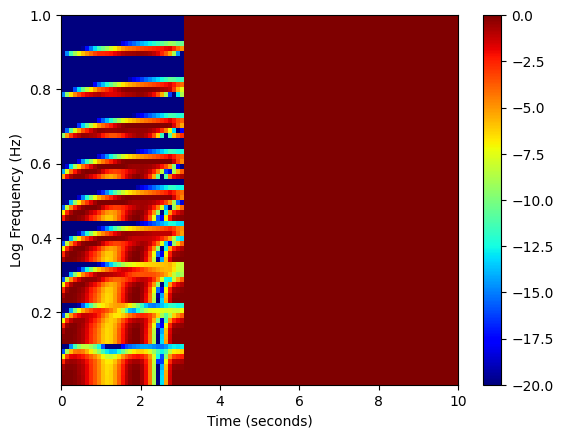

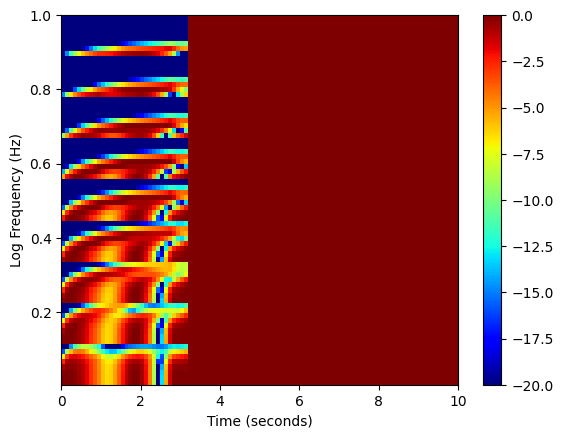

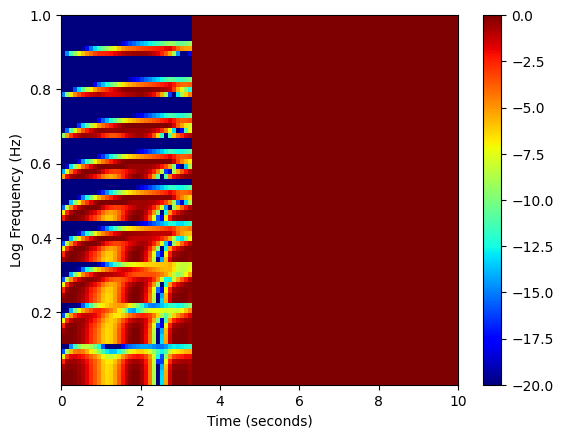

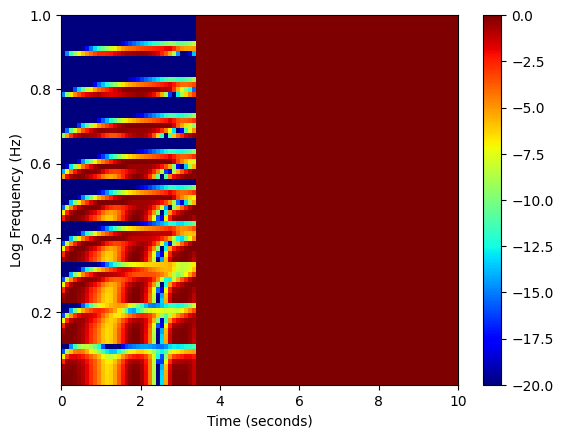

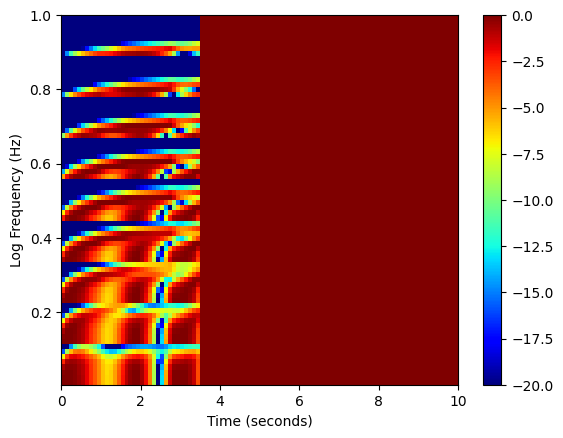

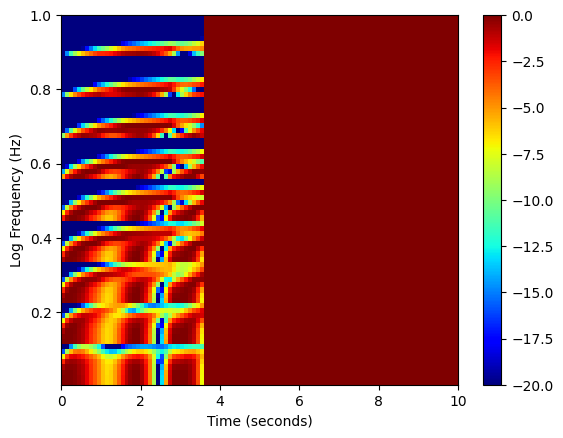

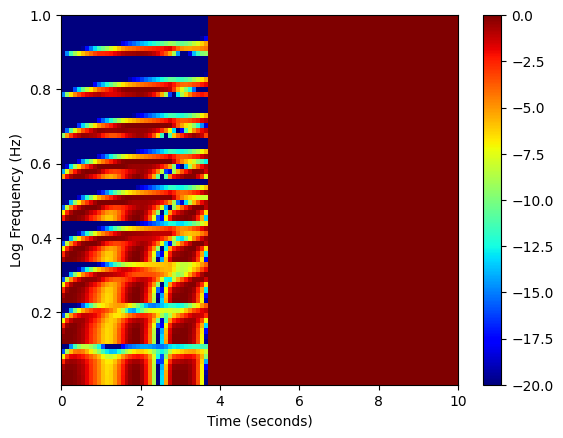

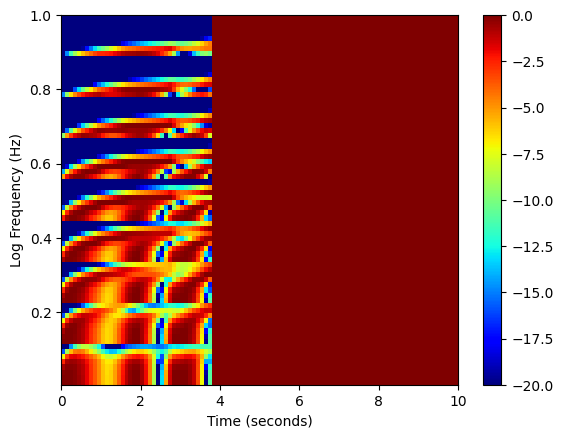

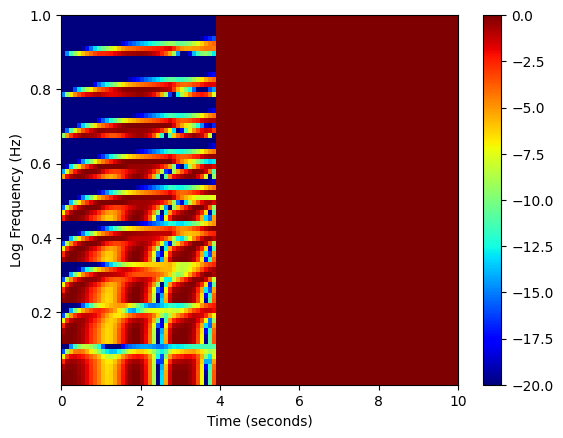

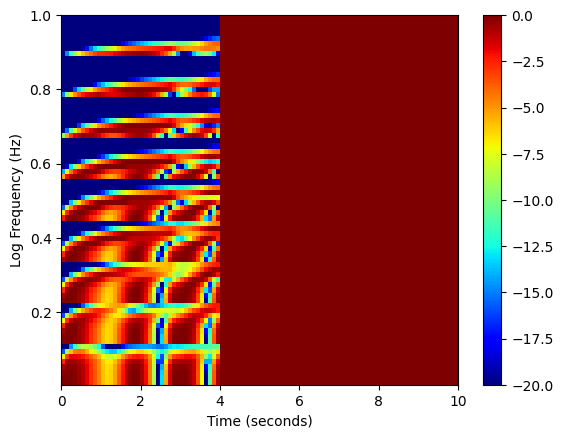

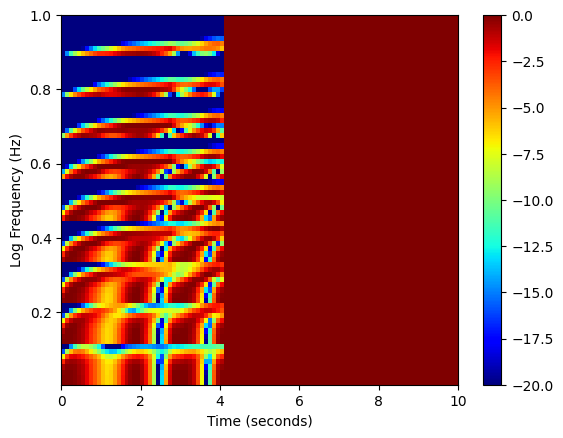

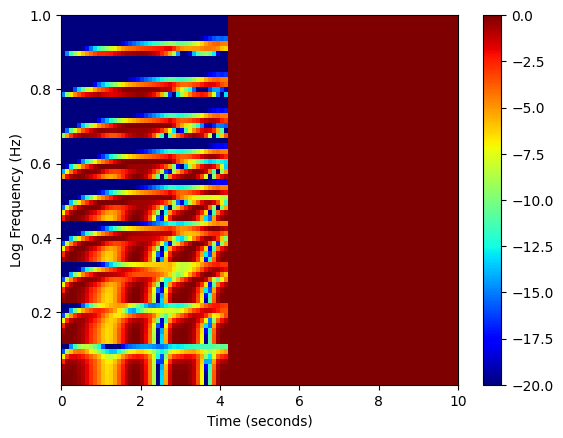

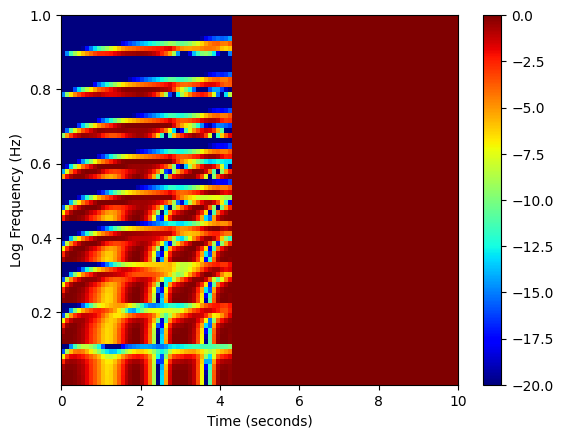

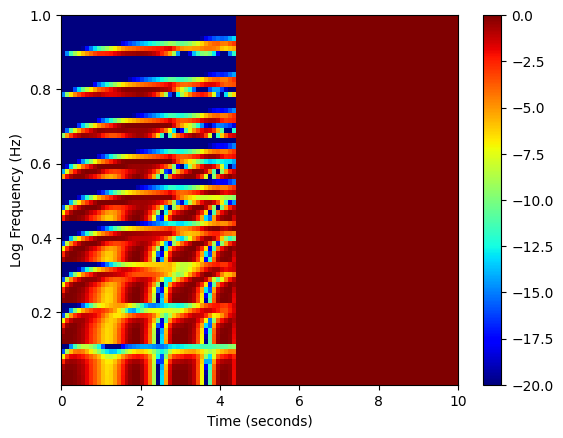

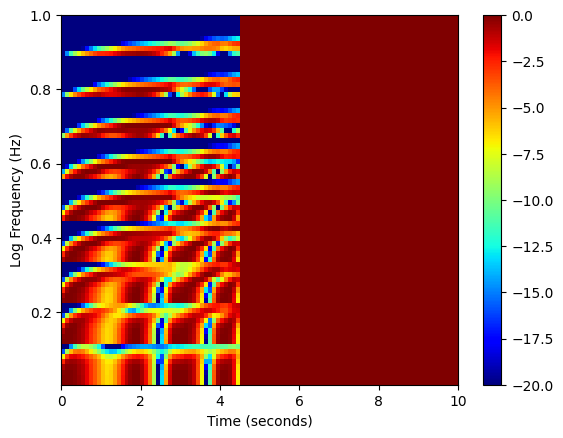

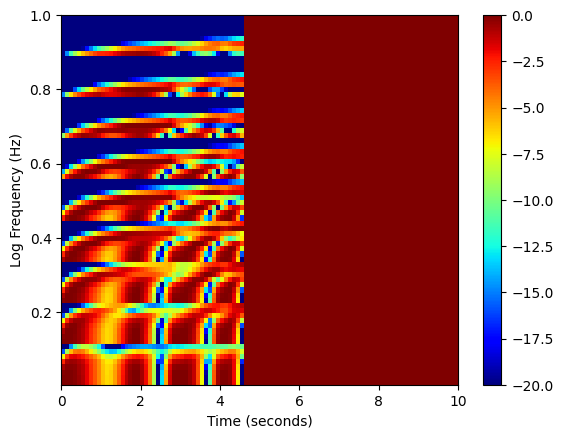

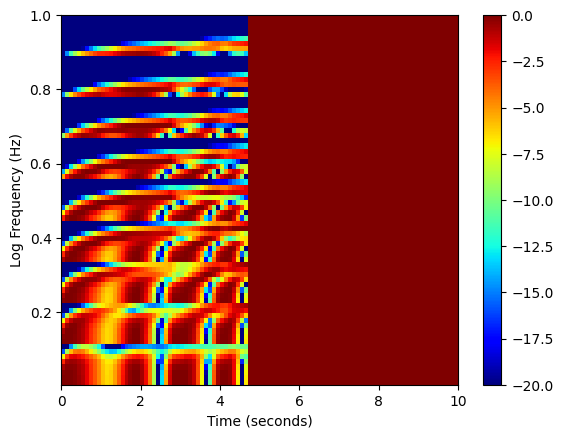

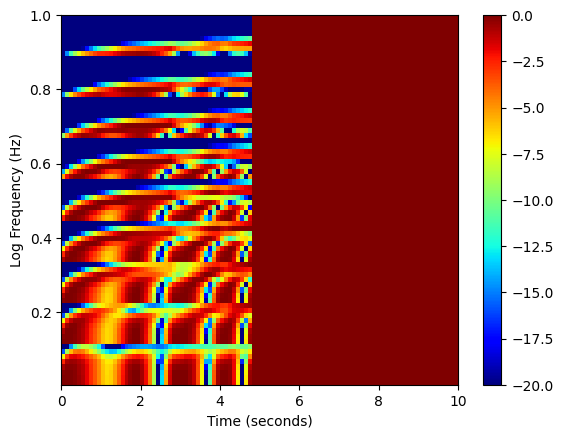

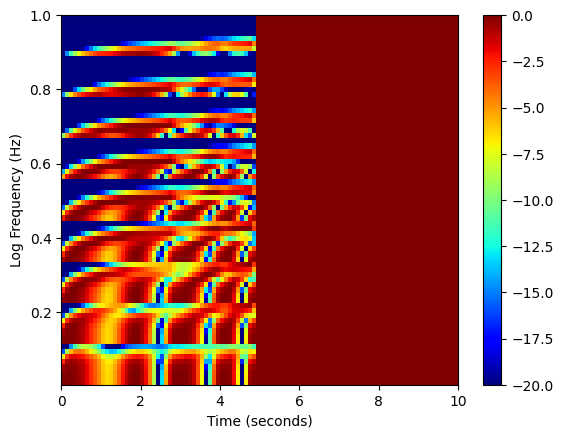

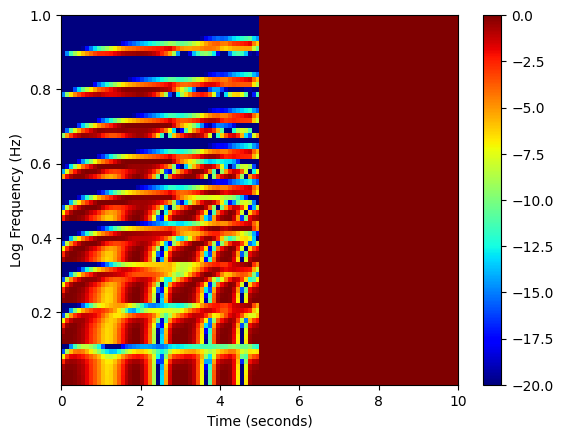

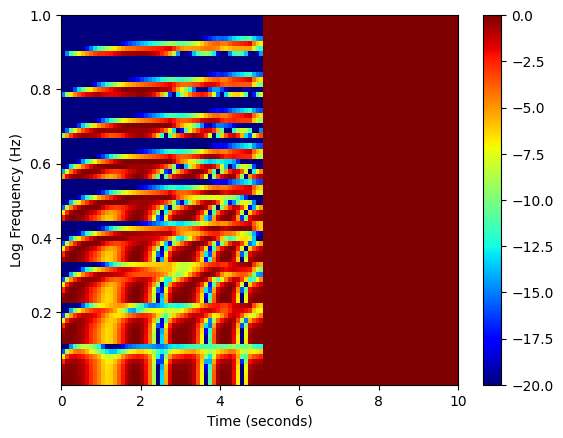

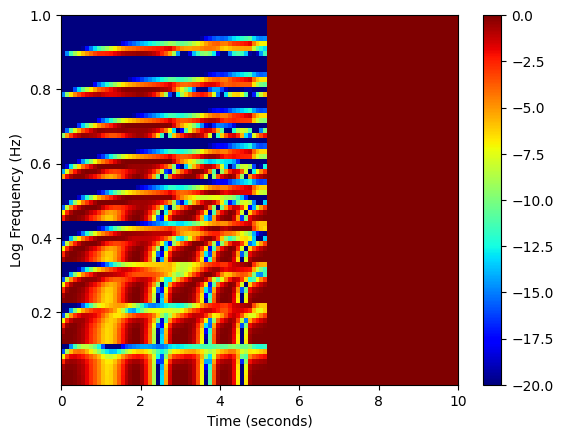

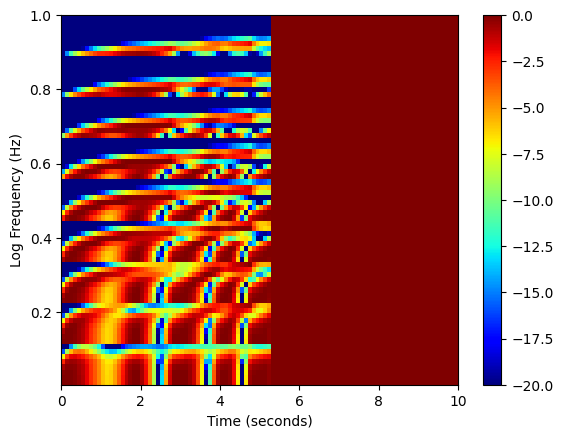

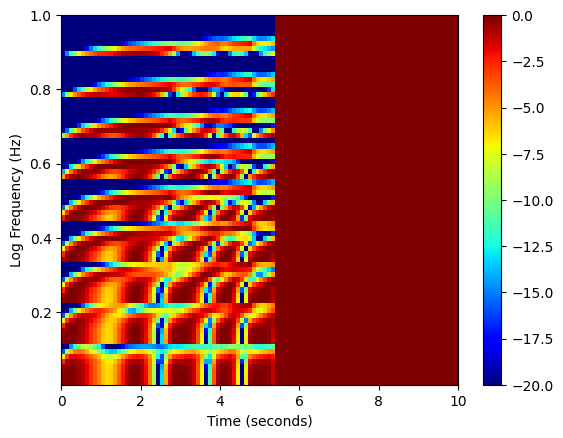

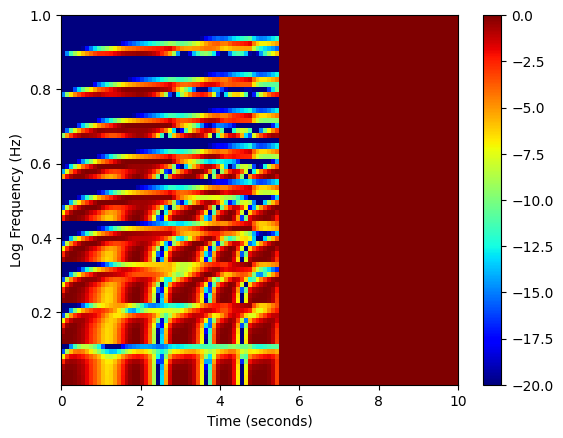

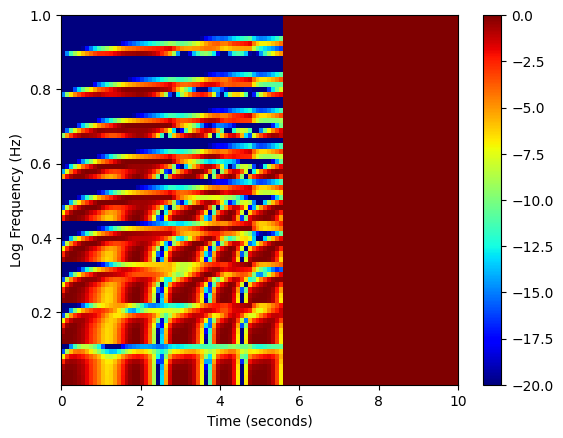

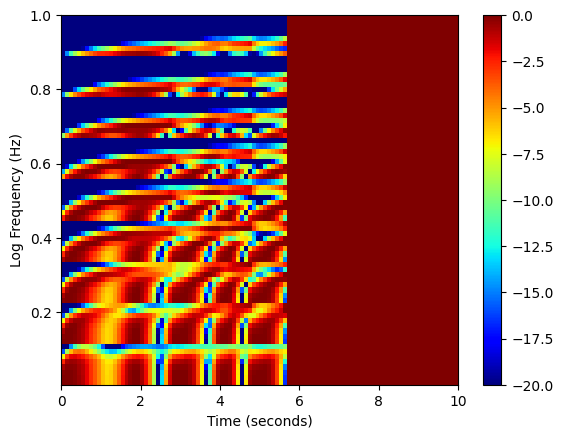

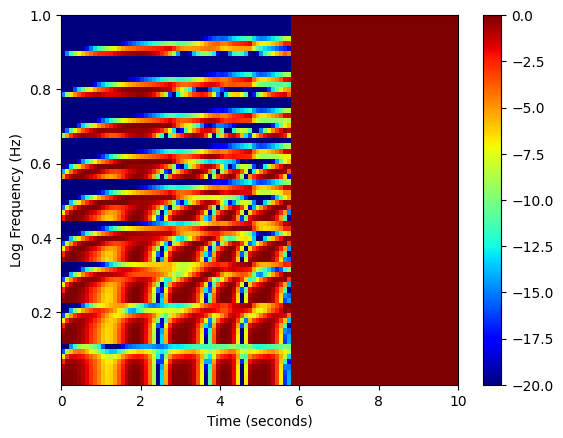

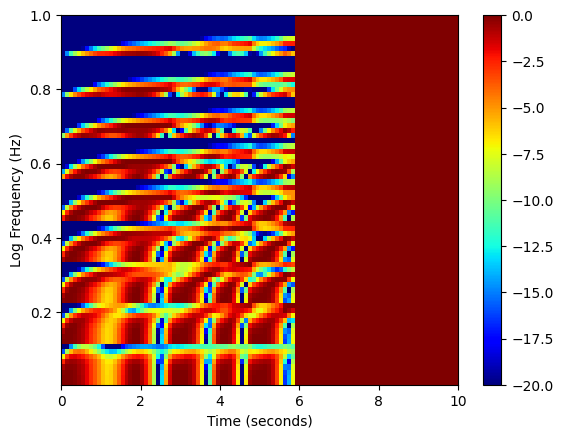

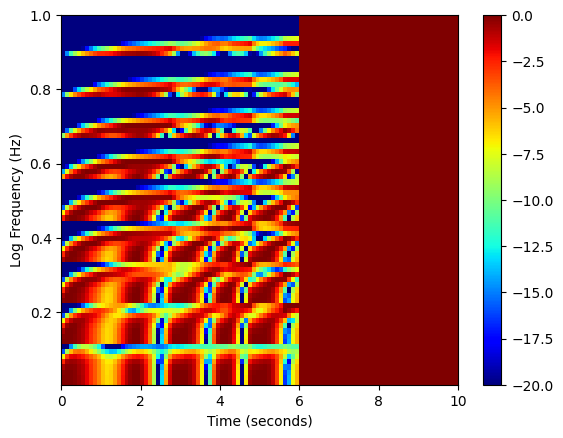

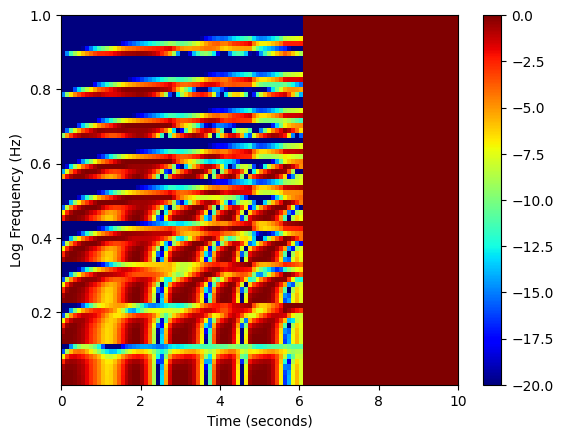

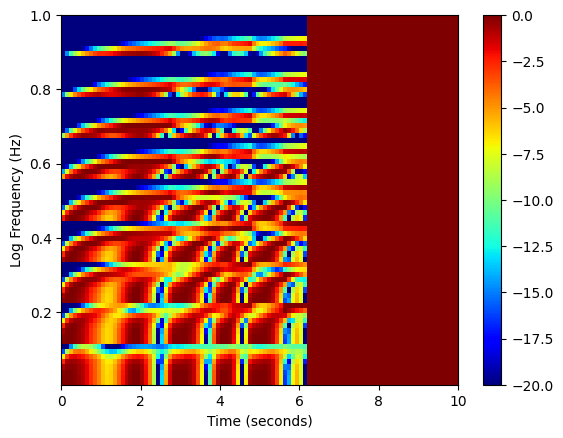

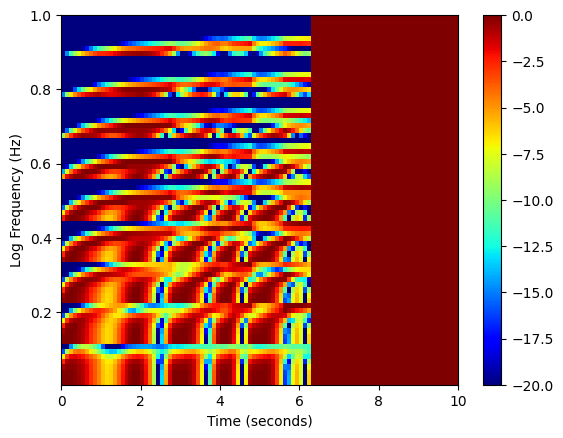

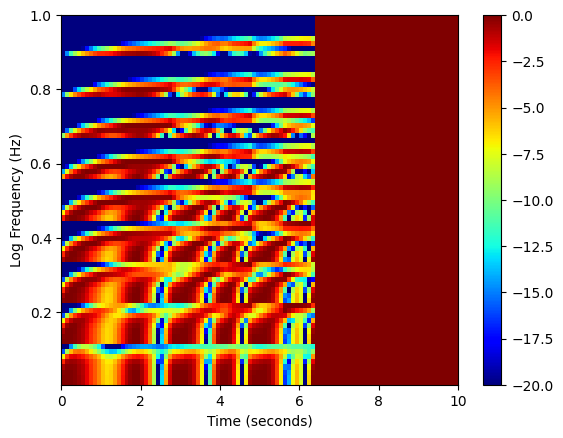

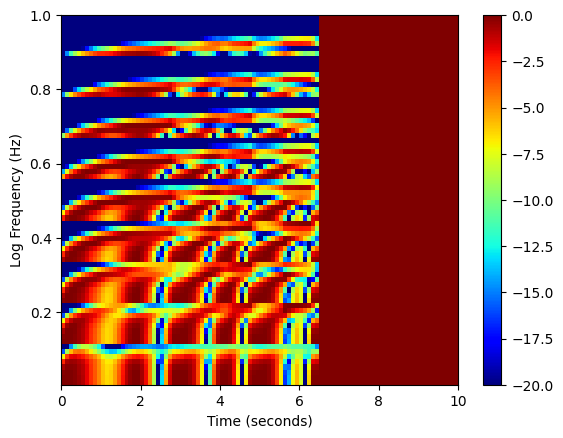

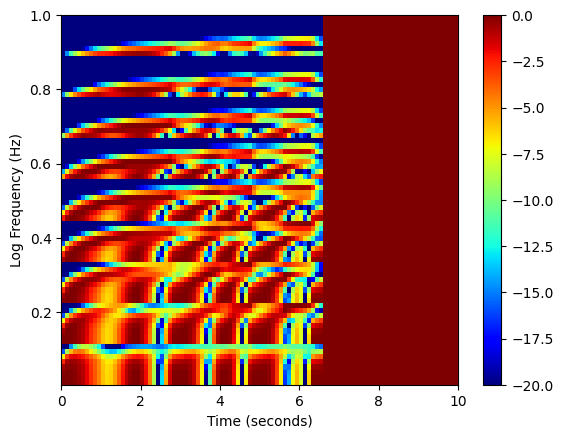

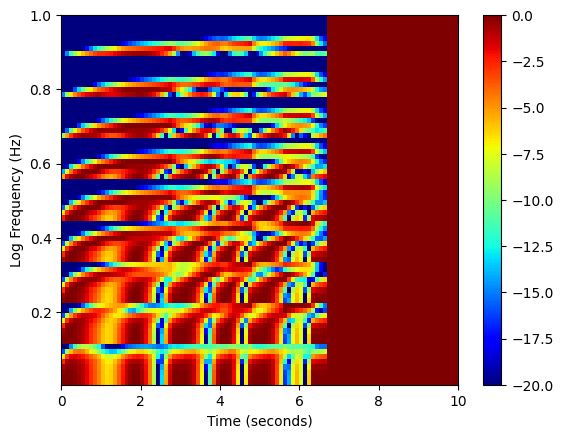

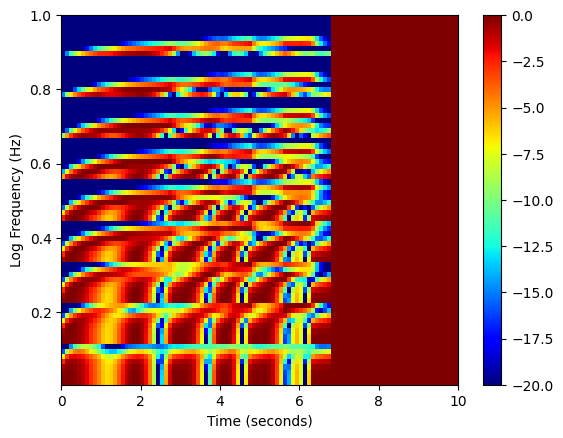

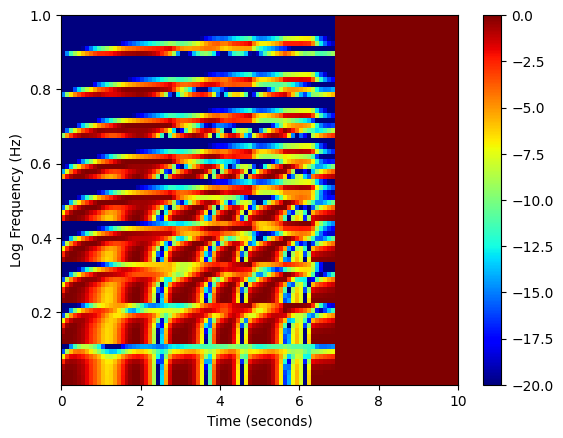

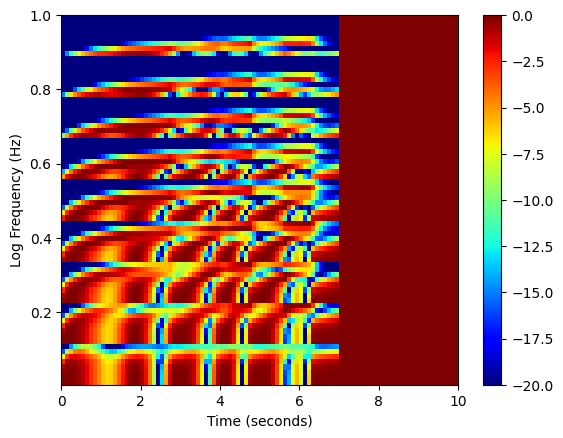

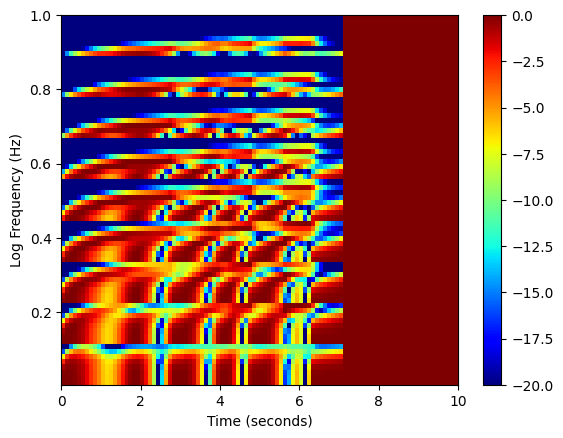

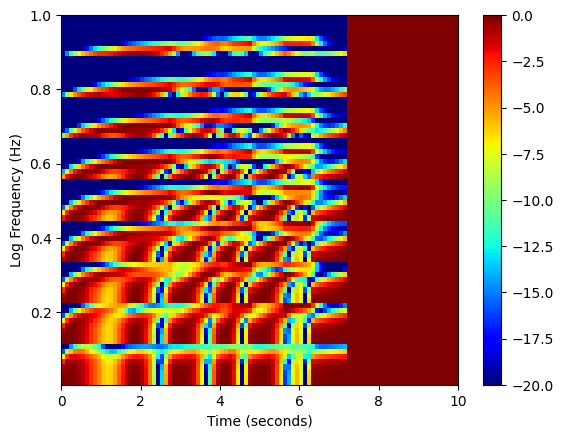

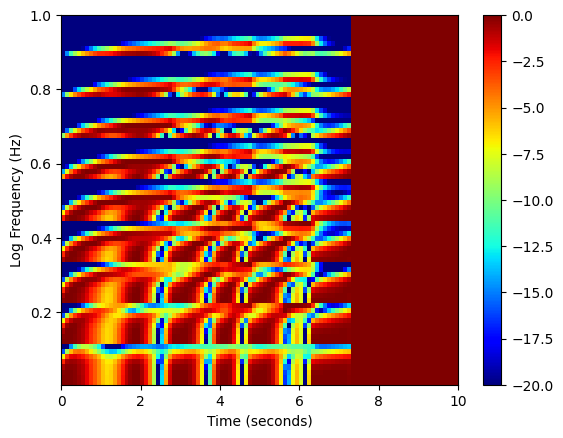

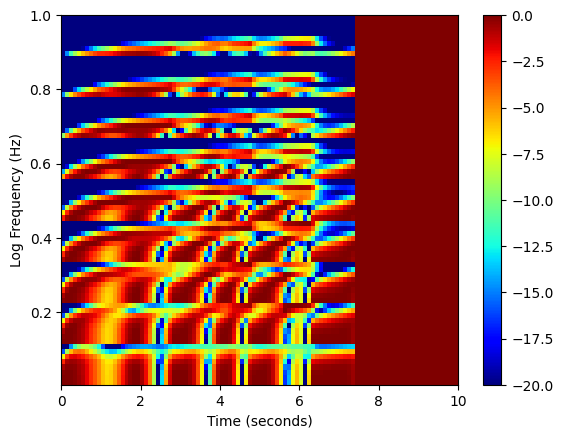

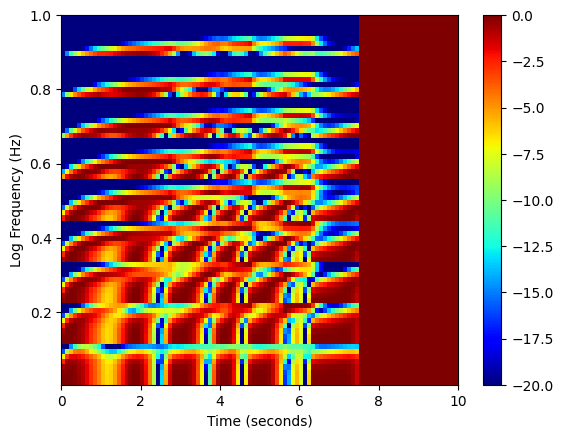

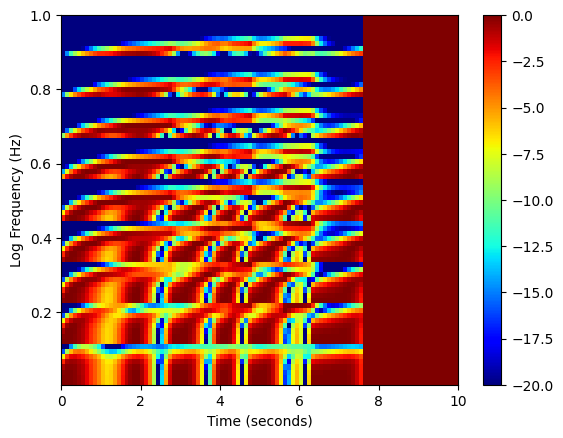

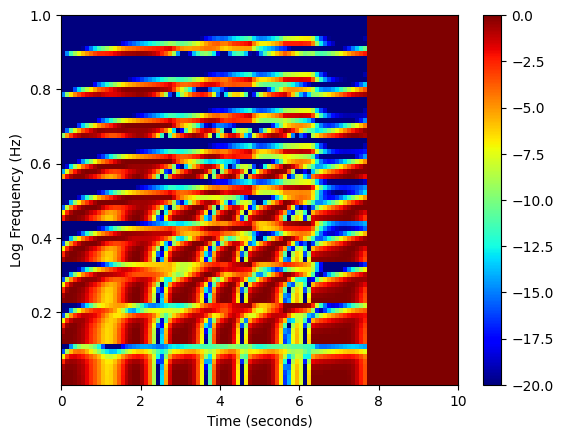

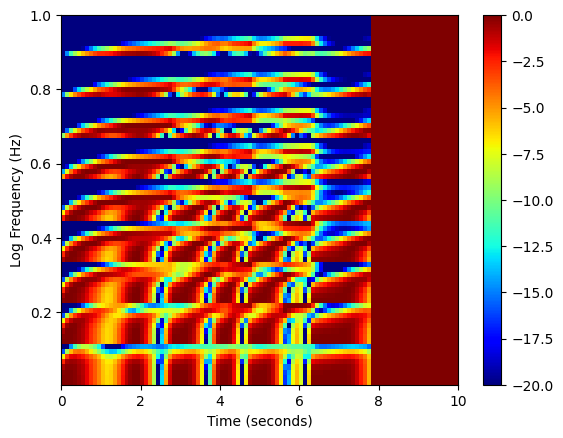

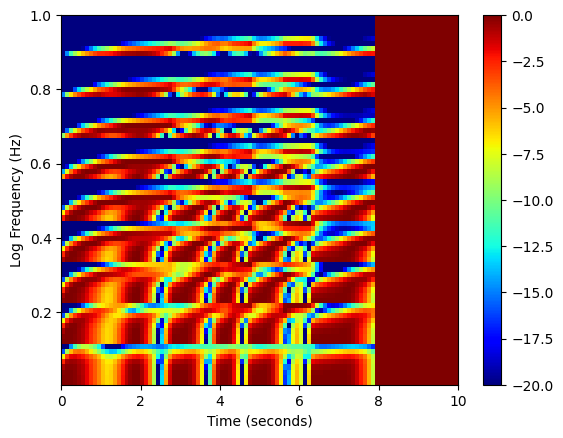

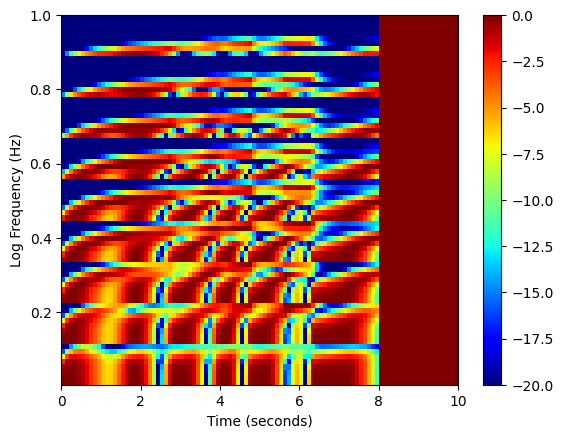

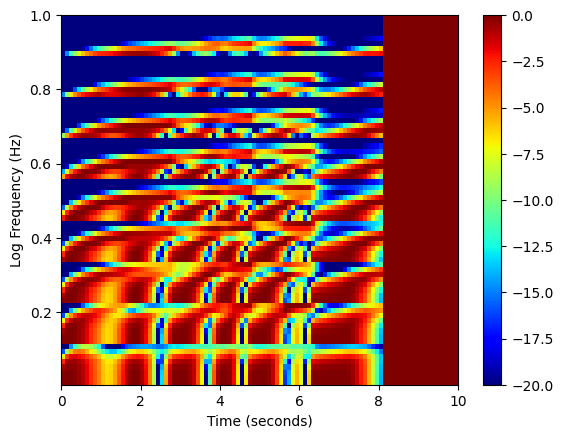

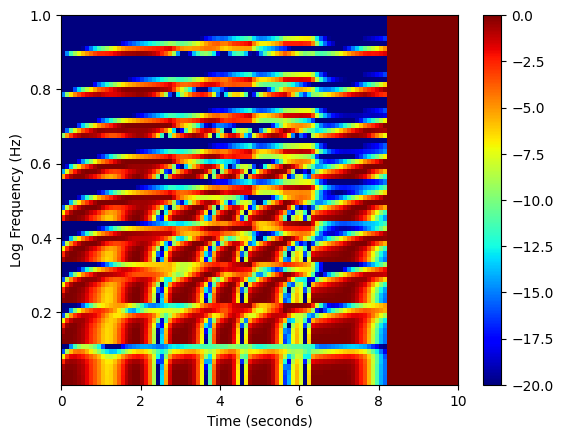

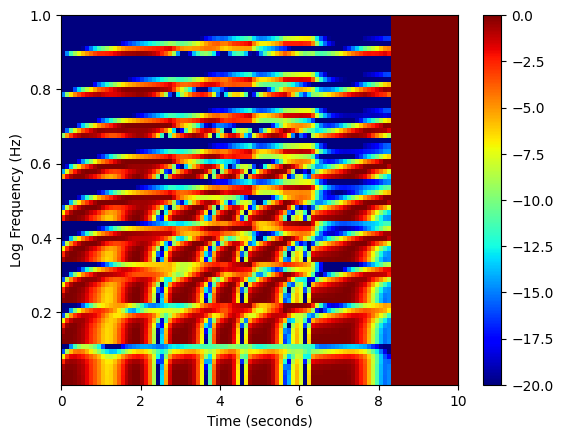

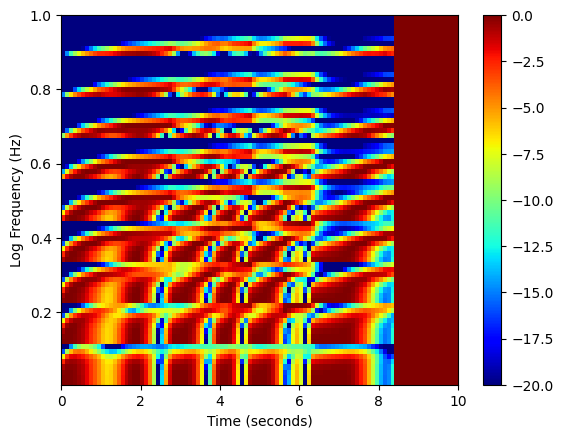

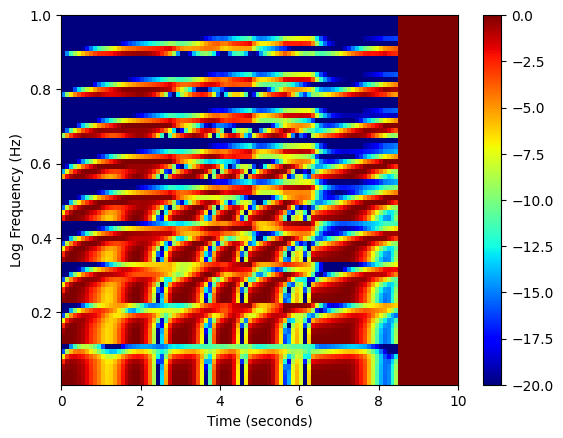

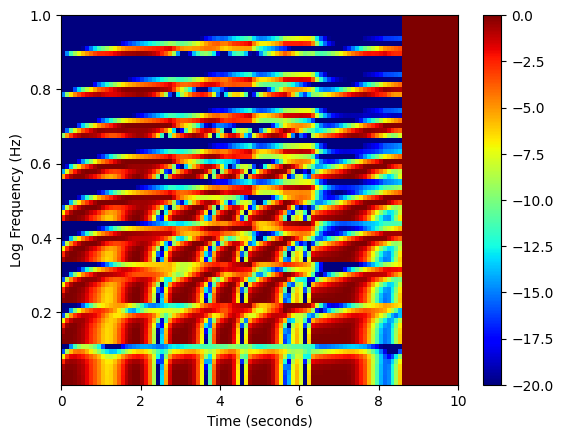

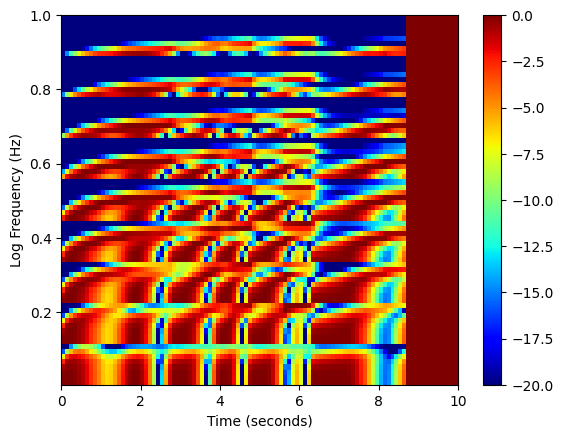

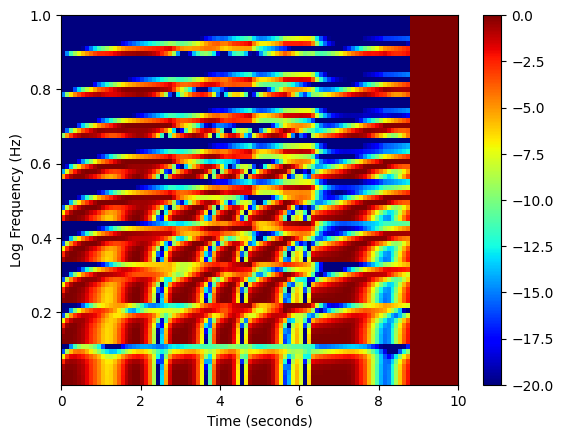

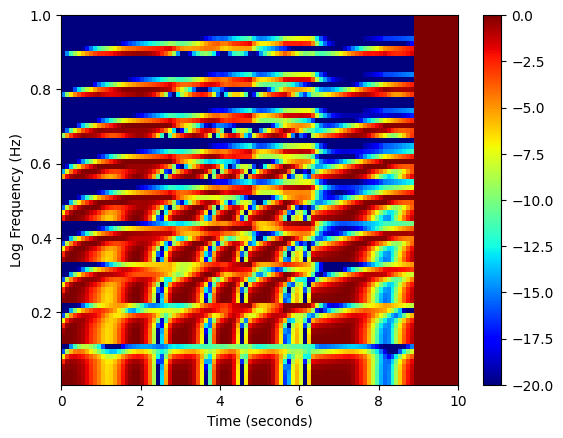

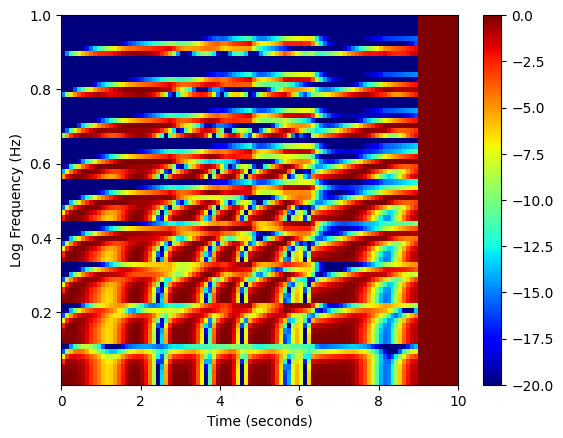

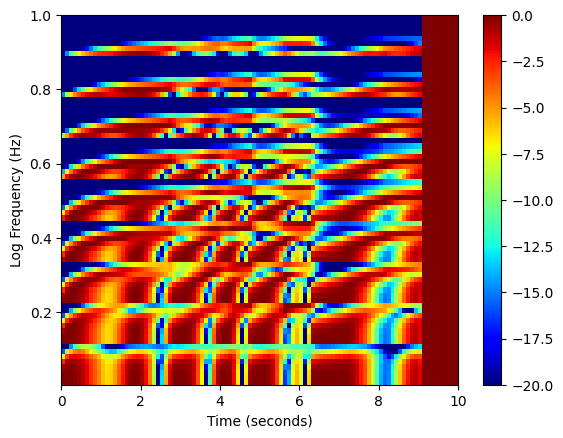

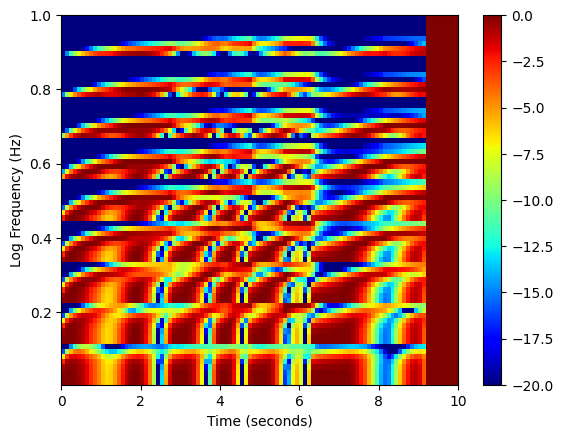

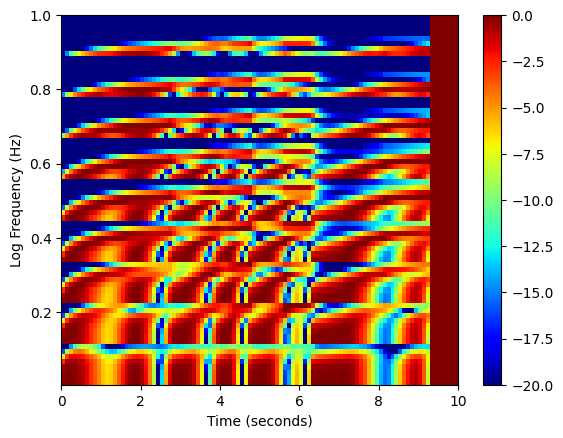

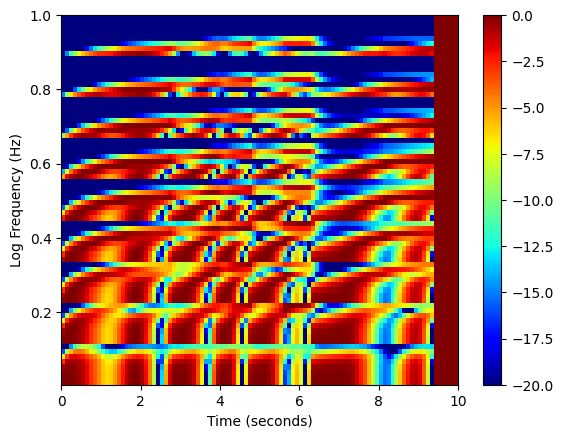

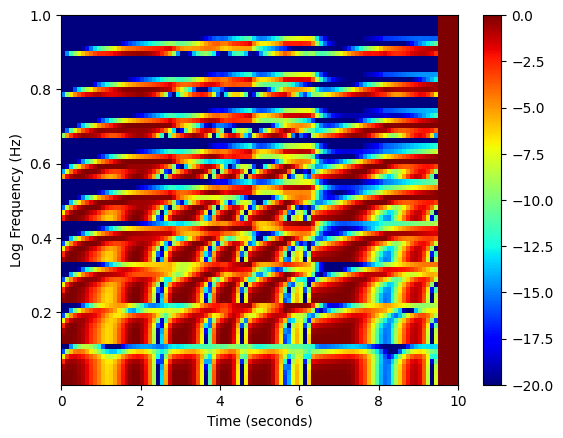

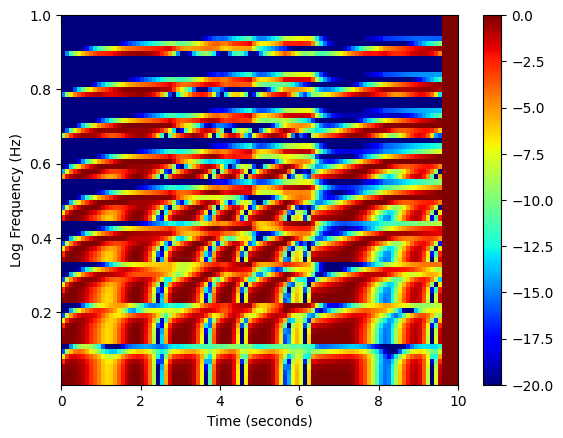

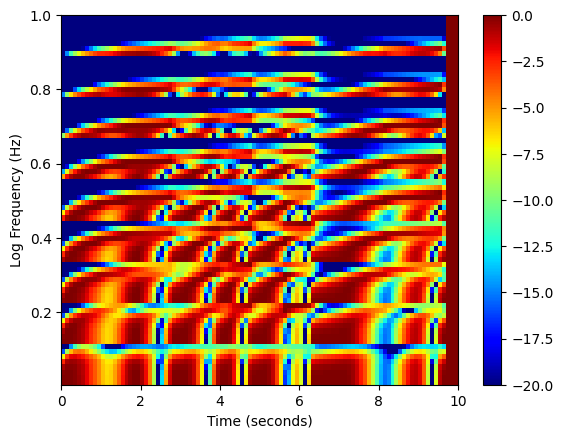

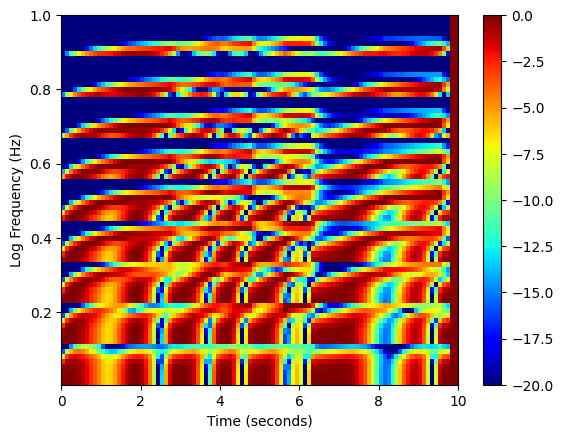

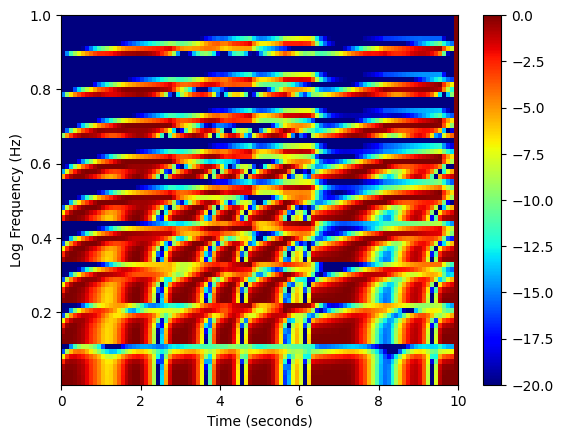

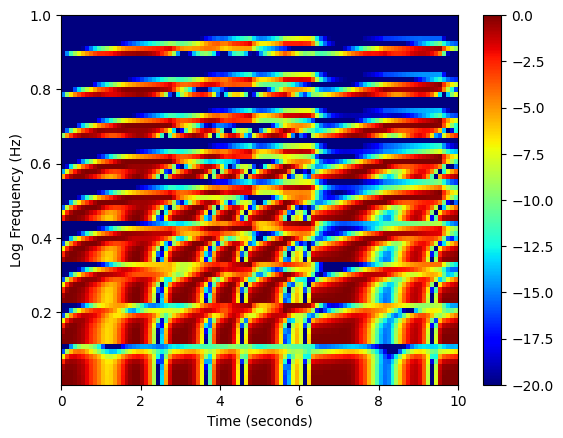

In [4]:
# Use this function when computing the time-frequency transform at a single temporal scale
omega = 2 * np.pi * np.array([1/1, 1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256])
numfreqs = np.size(omega)
numlevels = 8
N = 1.0
c = 2.0
rectimecausgabor = RecursiveTimeCausGaborMethod(omega, delta_t, c, numlevels, N, Nt)

k = 8

levels_arr = np.zeros((numfreqs*numlevels, Nt))

for n in range(Nt):
    levels = rectimecausgabor.process(testsignal[n])
    logspectrogram = rectimecausgabor.spectrogram(lowsoftthresh=0.00001, maxrange = 20)

    flattened_logspectrogram = logspectrogram.flatten()
    
    ind = np.argpartition(flattened_logspectrogram, -k)[-k:] # index of the k highest elements

    levels_arr[ind,n] = 1


(72, 100)


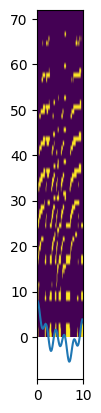

In [6]:

plt.imshow(levels_arr, origin='lower', extent=[0, delta_t*Nt, 0, numfreqs*numlevels])
print(levels_arr.shape)
plt.plot(time, 2*testsignal)